# 5호선 2단계 연장 구간과 서울 버스 341의 이용자 수 증감 비교
서울 버스 341은 2021년 10월부터 하남시 구간을 단축, 기점을 하남공영차고지에서 강동공영차고지로 이동하였다.
이는 기존 하남시 수요를 연장개통한 지하철 5호선이 상당수 가져갔기 때문이라 추정된다.
승하차량 데이터를 분석하여 이를 검증해보고자 한다.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

path = "c:\Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)


## 서울시 지하철 승하차량 데이터 불러오기

In [159]:
subway = pd.read_csv('./seoulSubway.csv', encoding='cp949')
subwaycolumns = subway.columns.to_list()
subway = subway[subwaycolumns[0:3] + subwaycolumns[-9:-1] + subwaycolumns[3:-9] + subwaycolumns[-1:]]
subway.head(5)


,사용월,호선명,지하철역,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,...,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,작업일자
0,202109,1호선,동대문,16,1094,1,0,0,0,0,...,16347,11322,11151,10908,9428,8032,8256,2074,6656,20211003
1,202109,1호선,동묘앞,1,961,0,0,0,0,0,...,5707,5183,3955,4461,3838,2917,4183,639,1860,20211003
2,202109,1호선,서울역,21,512,0,0,0,0,0,...,40820,48694,26669,52427,22994,31065,16271,8489,5615,20211003
3,202109,1호선,시청,5,103,0,0,0,0,0,...,6146,32513,3823,29053,3613,16795,2404,2724,855,20211003
4,202109,1호선,신설동,11,458,0,0,0,0,0,...,15616,12072,10030,10802,9277,7268,8409,1505,4260,20211003


## 5호선 2단계 연장 구간 역 분석

In [160]:
hanamCityhall = subway[subway['지하철역'] == '하남시청(덕풍?신장)']
hanamGeomdansan = subway[subway['지하철역'] == '하남검단산']

hanamCityhall.head(40)


,사용월,호선명,지하철역,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,...,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,작업일자
172,202109,5호선,하남시청(덕풍?신장),1,531,0,0,0,0,0,...,14160,4047,8142,3137,5708,2125,7844,430,2849,20211003
779,202108,5호선,하남시청(덕풍?신장),0,428,0,0,0,0,0,...,13904,3665,7820,3023,5625,1906,7049,363,2437,20210903
1386,202107,5호선,하남시청(덕풍?신장),2,674,0,0,0,0,0,...,15326,3753,8504,3173,6922,2375,6542,319,3137,20210803
1993,202106,5호선,하남시청(덕풍?신장),6,955,0,0,0,0,0,...,16426,3805,8965,3461,7672,2793,7719,410,4691,20210703
2601,202105,5호선,하남시청(덕풍?신장),1,860,0,0,0,0,0,...,15235,3981,9170,3319,7939,2850,8106,390,4356,20210603
3209,202104,5호선,하남시청(덕풍?신장),1,851,0,0,0,0,0,...,16213,3455,8809,3273,7536,2369,7233,393,4055,20210503
3817,202103,5호선,하남시청(덕풍?신장),0,119,0,0,0,0,0,...,2347,550,1405,496,1240,363,1225,76,636,20210403


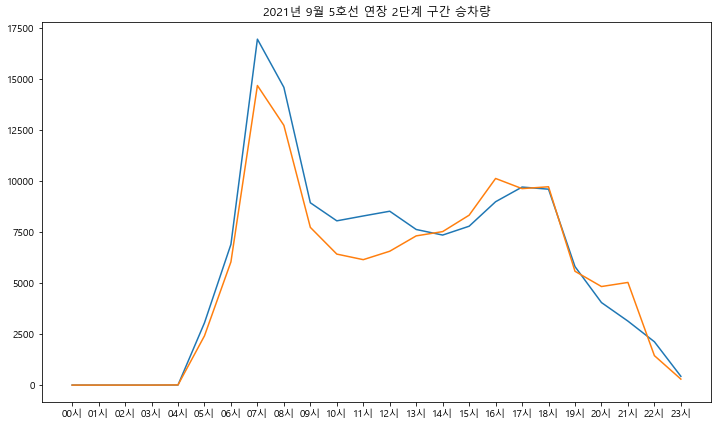

In [161]:
plt.figure(figsize=(12, 7))
plt.title('2021년 9월 5호선 연장 2단계 구간 승차량')
plt.xticks(list(range(24)), [i.split('-')[0] for i in list(hanamCityhall.columns)[3:-1:2]])
plt.plot(list(hanamCityhall.iloc[0][3:-1:2]))
plt.plot(list(hanamGeomdansan.iloc[0][3:-1:2]))

## 서울시 341번 21년 9월 버스정류장별 승하차량 데이터 불러오기

In [162]:
bus202109 = pd.read_csv('./seoulBus202109.csv', encoding='cp949')
bus202109[bus202109['노선번호']=='341'].head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
29206,202109,341,341번(하남공영차고지~강남역),121000088,22164,서초푸르지오써밋.롯데캐슬클래식,14,54,1,4,...,118,58,75,52,67,74,52,19,44,20211003
29208,202109,341,341번(강동공영차고지~우면동),121000088,22164,서초푸르지오써밋.롯데캐슬클래식,3,9,0,0,...,14,4,8,3,6,7,5,3,4,20211003
29215,202109,341,341번(하남공영차고지~강남역),121000090,22166,진흥아파트,10,42,0,0,...,71,15,38,16,56,28,53,13,29,20211003
29217,202109,341,341번(강동공영차고지~우면동),121000090,22166,진흥아파트,1,6,0,0,...,4,0,2,1,3,3,8,1,2,20211003
29220,202109,341,341번(하남공영차고지~강남역),121000091,22167,강남역.강남역사거리,9,162,0,0,...,111,38,60,53,87,53,79,24,69,20211003


In [163]:
jangjivil202109 = bus202109[(bus202109['역명'] == '장지마을') & (bus202109['노선번호'] == '341')]
jangjivilCenter202109 = bus202109[(
    bus202109['역명'] == '장지마을(중)') & (bus202109['노선번호'] == '341')]
jangjivil202109.head(5)


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
38685,202109,341,341번(강동공영차고지~우면동),227000245,65084,장지마을,0,3,0,2,...,17,1,14,1,8,1,19,1,12,20211003


In [164]:
jangjivilCenter202109.head(5)

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
38684,202109,341,341번(강동공영차고지~우면동),227000244,65085,장지마을(중),0,0,0,0,...,7,8,1,19,2,12,4,13,1,20211003


## 서울시 2020년 버스정류장별 승하차량 데이터 불러오기

In [165]:
bus2020 = pd.read_csv('./seoulBus2020.csv', encoding='cp949')
bus2020[bus2020['노선번호'] == '341'].head(5)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
38485,202001,341,341번(하남공영차고지~강남역),121000088,22164,서초푸르지오써밋.롯데캐슬클래식,41,123,0,1,...,335,97,211,58,161,67,222,37,104,20200203
38486,202001,341,341번(하남공영차고지~강남역),121000090,22166,진흥아파트,13,83,0,0,...,146,29,121,67,106,58,137,14,63,20200203
38487,202001,341,341번(하남공영차고지~강남역),121000091,22167,강남역.강남역사거리,59,258,0,0,...,271,101,156,101,157,118,94,71,124,20200203
38488,202001,341,341번(하남공영차고지~강남역),121000096,22172,신논현역.구교보타워사거리,702,134,55,9,...,192,418,160,532,111,686,126,590,81,20200203
38489,202001,341,341번(하남공영차고지~강남역),122000093,23196,강남경찰서면허시험장,34,147,0,0,...,111,44,59,53,94,68,99,118,153,20200203


In [166]:
jangjivil2020 = bus2020[(bus2020['역명'] == '장지마을') &
                        (bus2020['노선번호'] == '341')]

jangjivil2020.head(5)


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
38571,202001,341,341번(하남공영차고지~강남역),227000245,65084,장지마을,21,365,43,356,...,508,17,447,8,390,16,433,18,429,20200203
77506,202002,341,341번(하남공영차고지~강남역),227000245,65084,장지마을,29,341,41,252,...,492,12,362,10,367,14,385,13,324,20200303
116659,202003,341,341번(하남공영차고지~강남역),227000245,65084,장지마을,31,325,55,258,...,500,5,401,13,414,20,386,6,305,20200403
155737,202004,341,341번(하남공영차고지~강남역),227000245,65084,장지마을,19,303,34,197,...,459,16,426,16,396,13,368,11,368,20200503
194815,202005,341,341번(하남공영차고지~강남역),227000245,65084,장지마을,16,351,34,237,...,517,10,310,13,358,10,358,6,272,20200603


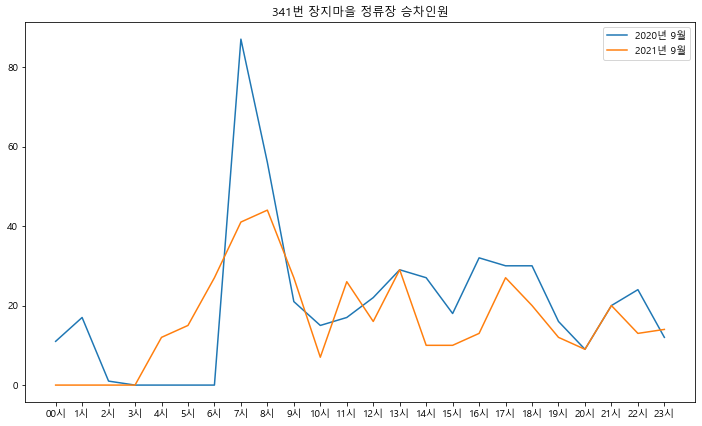

In [167]:
plt.figure(figsize=(12, 7))
plt.title('341번 장지마을 정류장 승차인원')
plt.xticks(list(range(24)), [i.split('승')[0] for i in list(jangjivil2020.columns)[6:-1:2]])
plt.plot(list(jangjivil2020.iloc[8][6:-1:2]), label='2020년 9월')
plt.plot(list(jangjivil202109.iloc[0][6:-1:2] +
         jangjivilCenter202109.iloc[0][6:-1:2]), label='2021년 9월')
plt.legend()


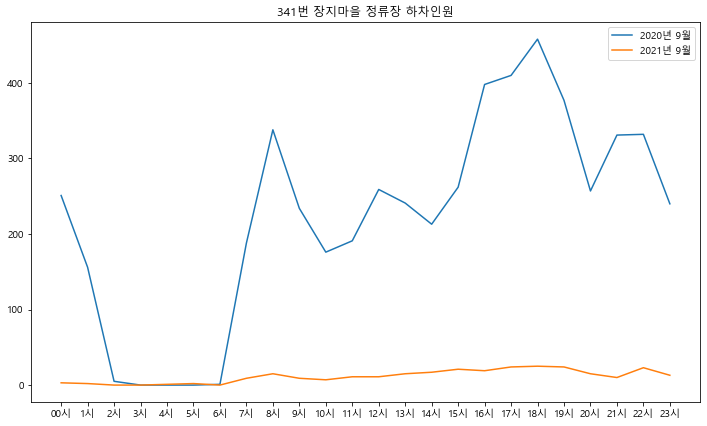

In [168]:
plt.figure(figsize=(12, 7))
plt.title('341번 장지마을 정류장 하차인원')
plt.xticks(list(range(24)), [i.split('하')[0]
           for i in list(jangjivil2020.columns)[7:-1:2]])
plt.plot(list(jangjivil2020.iloc[8][7:-1:2]), label='2020년 9월')
plt.plot(list(jangjivil202109.iloc[0][7:-1:2] +
         jangjivilCenter202109.iloc[0][7:-1:2]), label='2021년 9월')
plt.legend()


## 하남시청역, 하남검단산역 주변 버스정류장 승하차인원 비교

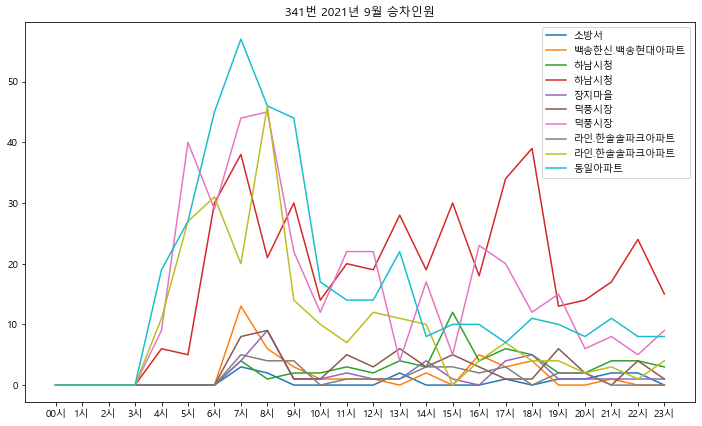

In [169]:
#반경 800m 이내 341번 정거장 합해서 5호선 승하차 인원과 비교
#라인.한솔솔파크아파트, 덕풍시장, 장지마을, 장지마을(중), 하남시청, 동일아파트,
#백송한신.백송현대아파트, 소방서, 하남검단산역.창우초교(중)
#정류장 id 227000133~4, 227000241~7, 227000252~3, 227000262
#2020 9월 데이터에 241(장지마을(중)), 244(하남검단산역)번 누락으로 생략

idlist = [133, 134, 242, 243, 245, 246, 247, 252, 253, 262]
businfo21 = []
for i in range(0, 10):
    businfo21.append(bus202109[(
        bus202109['표준버스정류장ID'] == 227000000 + idlist[i]) & (bus202109['노선번호'] == '341')])
        
plt.figure(figsize=(12, 7))
plt.title('341번 2021년 9월 승차인원')
plt.xticks(list(range(24)), [i.split('승')[0]
           for i in list(jangjivil2020.columns)[6:-2:2]])
for i in range(0, 10):
    plt.plot(list(businfo21[i].iloc[0][6:-2:2]), label=businfo21[i].iloc[0][5])
plt.legend()


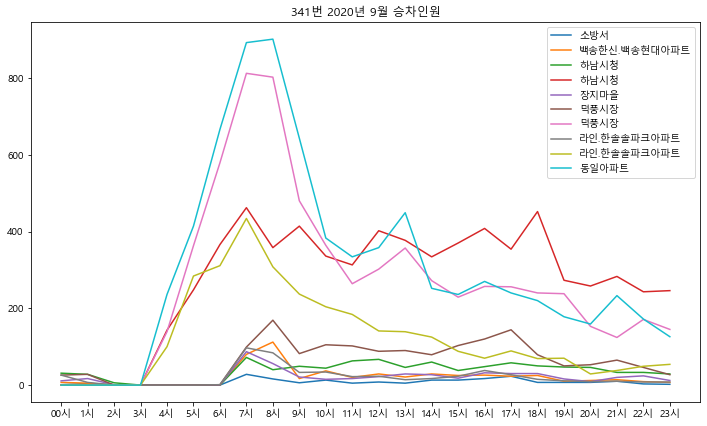

In [170]:
businfo20 = []
for i in range(0, 10):
    businfo20.append(bus2020[(bus2020['표준버스정류장ID'] ==
                     227000000 + idlist[i]) & (bus2020['노선번호'] == '341')])

plt.figure(figsize=(12, 7))
plt.title('341번 2020년 9월 승차인원')
plt.xticks(list(range(24)), [i.split('승')[0]
           for i in list(jangjivil2020.columns)[6:-2:2]])
for i in range(0, 10):
    plt.plot(list(businfo20[i].iloc[8][6:-2:2]), label=businfo20[i].iloc[0][5])
plt.legend()


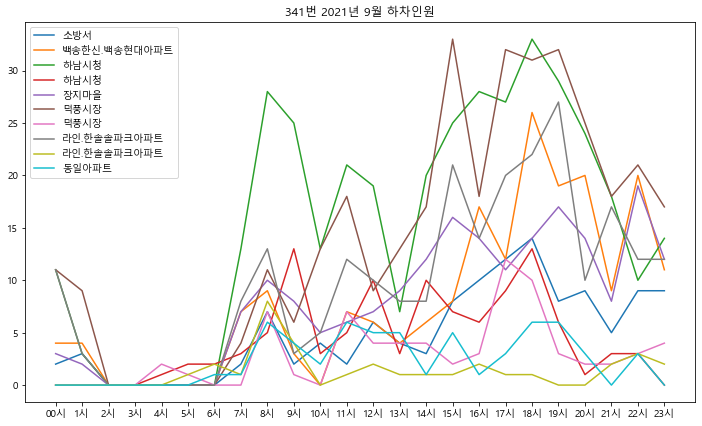

In [171]:
plt.figure(figsize=(12, 7))
plt.title('341번 2021년 9월 하차인원')
plt.xticks(list(range(24)), [i.split('하')[0]
           for i in list(jangjivil2020.columns)[7:-1:2]])
for i in range(0, 10):
    plt.plot(list(businfo21[i].iloc[0][7:-1:2]), label=businfo21[i].iloc[0][5])
plt.legend()


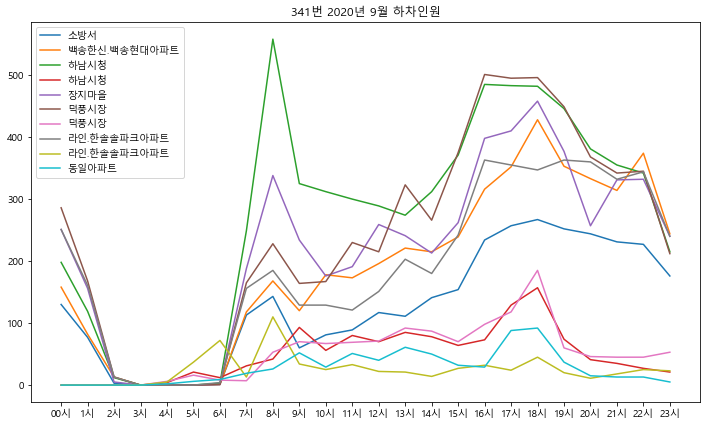

In [172]:
plt.figure(figsize=(12, 7))
plt.title('341번 2020년 9월 하차인원')
plt.xticks(list(range(24)), [i.split('하')[0]
           for i in list(jangjivil2020.columns)[7:-1:2]])
for i in range(0, 10):
    plt.plot(list(businfo20[i].iloc[8][7:-1:2]), label=businfo20[i].iloc[0][5])
plt.legend()


In [173]:
# TODO: 상 하행 구분, 합계, 5호선과 비교